In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from datetime import date
from pylab import rcParams
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import math

In [ ]:
rcParams['figure.figsize'] = 20, 10

In [ ]:
data1=pd.read_csv('/content/ADDYY.csv') #ADIDAS
data2=pd.read_csv('/content/AAPL.csv')  #APPLE
data3=pd.read_csv('/content/TM.csv')    #TOYOTA MOTORS

In [ ]:
data1.loc[:, 'Date'] = pd.to_datetime(data1['Date'],format='%Y-%m-%d')
data1['Month'] = data1['Date'].dt.month
data1.sort_values(by='Date', inplace=True, ascending=True)
data1.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Month
0,2011-06-13,35.889999,36.230000,35.869999,35.869999,31.387390,7000,6
1,2011-06-14,36.599998,36.700001,36.410000,36.509998,31.947405,11000,6
2,2011-06-15,36.360001,36.570000,35.849998,36.200001,31.676157,51000,6
3,2011-06-16,35.470001,35.570000,35.209999,35.360001,30.941120,20400,6
4,2011-06-17,36.500000,36.700001,36.299999,36.500000,31.938662,16800,6


In [ ]:
data2.loc[:, 'Date'] = pd.to_datetime(data2['Date'],format='%Y-%m-%d')
data2['Month'] = data2['Date'].dt.month
data2.sort_values(by='Date', inplace=True, ascending=True)
data2.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Month
0,2011-06-13,11.685714,11.725357,11.609643,11.664286,10.030155,329473200,6
1,2011-06-14,11.785714,11.901786,11.761071,11.872857,10.209505,334569200,6
2,2011-06-15,11.776786,11.796429,11.602857,11.669643,10.034760,399196000,6
3,2011-06-16,11.675000,11.738571,11.368929,11.612857,9.985929,510591200,6
4,2011-06-17,11.749643,11.758929,11.405714,11.437857,9.835445,615020000,6


In [ ]:
data3.loc[:, 'Date'] = pd.to_datetime(data3['Date'],format='%Y-%m-%d')
data3['Month'] = data3['Date'].dt.month
data3.sort_values(by='Date', inplace=True, ascending=True)
data3.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Month
0,2011-06-13,80.209999,80.260002,79.400002,79.720001,69.560913,836200,6
1,2011-06-14,80.080002,80.660004,80.040001,80.440002,70.189163,464200,6
2,2011-06-15,79.910004,80.330002,79.279999,79.480003,69.351509,550600,6
3,2011-06-16,79.239998,79.750000,79.029999,79.470001,69.342773,580200,6
4,2011-06-17,79.610001,79.900002,79.370003,79.510002,69.377678,375000,6


# ADIDAS

FOR ADIDAS
Shape of Training data = (1259, 2)
Shape of Cross Validation data = (629, 2)
Shape of Test Data = (629, 2)


Text(0, 0.5, 'Adj Closing Price')

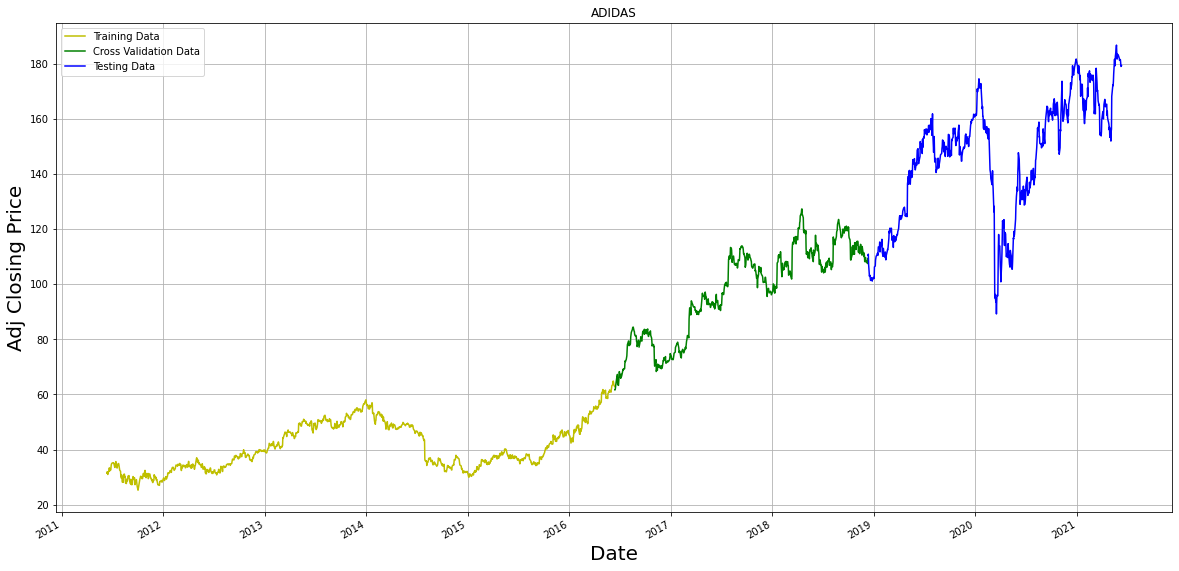

In [ ]:
num_crossval = int(0.25*len(data1))
num_test = int(0.25*len(data1))
num_train = len(data1) - num_crossval - num_test
data_crossvaltrain = data1[:num_train+num_crossval][['Date', 'Adj Close']]
data_train = data1[:num_train][['Date', 'Adj Close']]
data_crossval = data1[num_train:num_train+num_crossval][['Date', 'Adj Close']]
data_test = data1[num_train+num_crossval:][['Date', 'Adj Close']]
print("FOR ADIDAS")
print("Shape of Training data = " + str(data_train.shape))
print("Shape of Cross Validation data = " + str(data_crossval.shape))
print("Shape of Test Data = " + str(data_test.shape))
plot = data_train.plot(x='Date', y='Adj Close', style='y-', grid=True,title="ADIDAS")
plot = data_crossval.plot(x='Date', y='Adj Close', style='g-', grid=True, ax=plot)
plot = data_test.plot(x='Date', y='Adj Close', style='b-', grid=True, ax=plot)
plot.legend(['Training Data', 'Cross Validation Data', 'Testing Data'])
plot.set_xlabel("Date",fontsize=20)
plot.set_ylabel("Adj Closing Price",fontsize=20)

In [ ]:
def movingavg(data, target, N, minpr, offset):
    
    pred_list = data[target].rolling(window = N, min_periods=1).mean() 
    pred_list = np.concatenate((np.array([np.nan]), np.array(pred_list[:-1])))
    pred_list = np.array(pred_list)
    pred_list[pred_list < minpr] = minpr
    
    return pred_list[offset:]

RMSE = [1.5531707293181853, 1.7539587592143855, 1.9613604308036516, 2.147656627775289, 2.3222918955428717, 2.4911603346157296, 2.6566611613677273, 2.8219407762641535, 2.982395896014782, 3.1304801807572873, 3.265278123937809, 3.3932624008623256, 3.5175486457677096, 3.639426777063121, 3.756335089991174, 3.867438966860003, 3.9746706158582414, 4.077775448487903, 4.178534705082669, 4.277777291062366, 4.3753054521437384, 4.4698099009201355, 4.5620760351681655, 4.65227090967838]


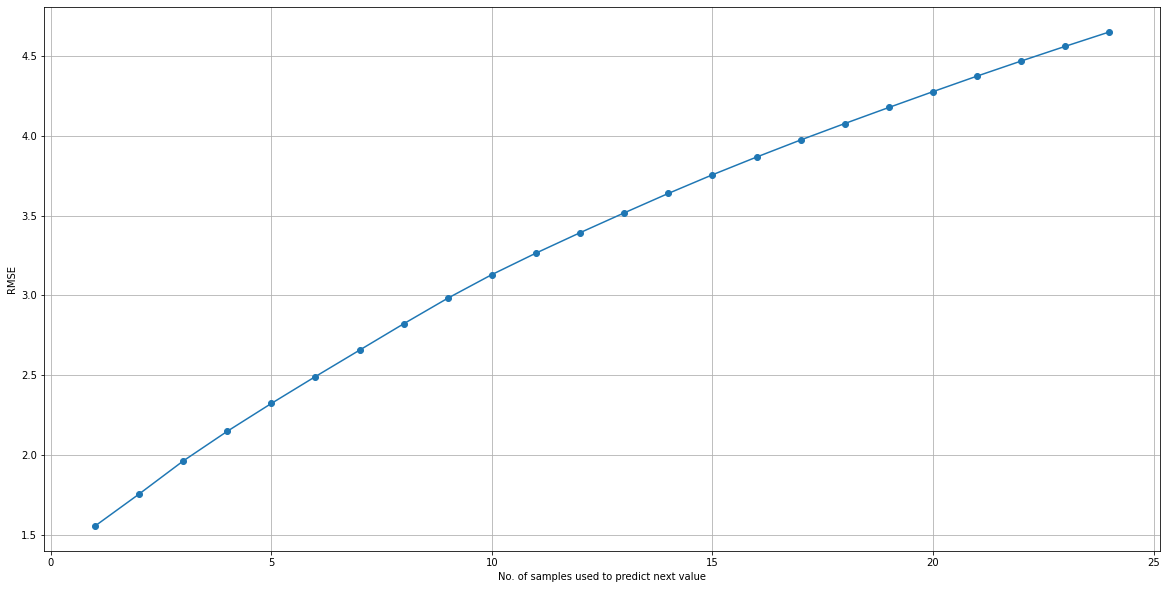

In [ ]:
RMSE = []

for N in range(1, 25): 
    output = movingavg(data_crossvaltrain, 'Adj Close', N, 0, num_train)
    data_crossval.loc[:, 'output' + '_N' + str(N)] = output
    RMSE.append(math.sqrt(mean_squared_error(output, data_crossval['Adj Close'])))
    
print('RMSE = ' + str(RMSE))
plt.plot(range(1, 25), RMSE, 'o-')
plt.xlabel('No. of samples used to predict next value')
plt.ylabel('RMSE')
plt.grid()


In [ ]:
Nfin=2 #from graph

Text(0, 0.5, 'Adj Closing price')

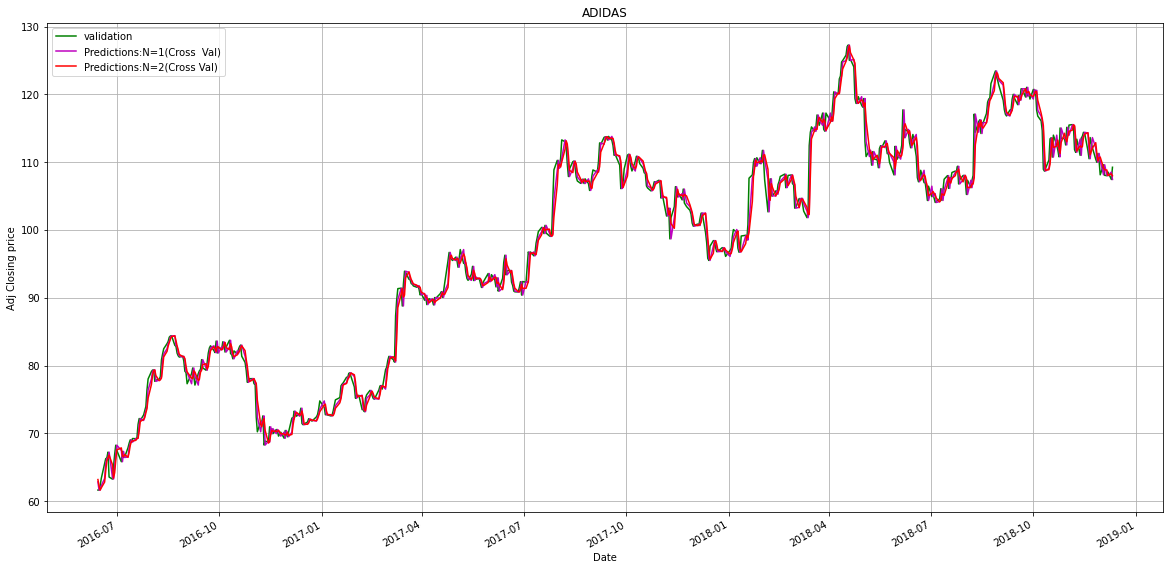

In [ ]:
p = data_crossval.plot(x='Date', y='Adj Close', style='g-', grid=True, title="ADIDAS")
p = data_crossval.plot(x='Date', y='output_N1', style='m-', grid=True, ax=p)
p = data_crossval.plot(x= 'Date', y='output_N2', style='r-', grid=True, ax=p)
p.legend([ 'validation',  'Predictions:N=1(Cross  Val)', 'Predictions:N=2(Cross Val)'])
p.set_xlabel("Date")
p.set_ylabel("Adj Closing price")

RMSE = 3.404
R2 Score on Test Data= 0.9759663228639565


Text(0, 0.5, 'Adj Closing Price')

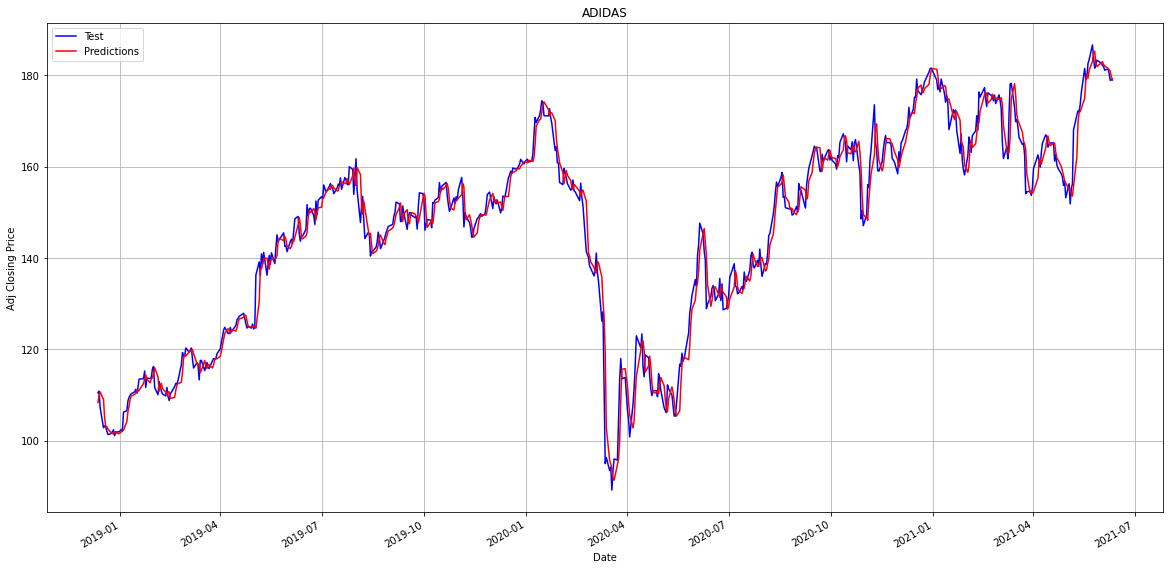

In [ ]:
###Final Model , Nfinal(Nfin)=2
estimate = movingavg(data1, 'Adj Close', 2, 0, num_train+num_crossval)
data_test.loc[:, 'output' + '_N' + str(2)] = estimate
print("RMSE = %0.3f" % math.sqrt(mean_squared_error(estimate, data_test['Adj Close'])))
print("R2 Score on Test Data=",r2_score(data_test["Adj Close"],data_test["output_N2"]))
p = data_test.plot(x='Date', y='Adj Close', style='b-', grid=True,title="ADIDAS" )
p = data_test.plot(x='Date', y='output_N2', style='r-', grid=True, ax=p)
p.legend([ 'Test', 'Predictions'])
p.set_xlabel("Date")
p.set_ylabel("Adj Closing Price")

# APPLE

FOR APPLE
Shape of Training data = (1259, 2)
Shape of Cross Validation data = (629, 2)
Shape of Test Data = (629, 2)


Text(0, 0.5, 'Adj Closing Price')

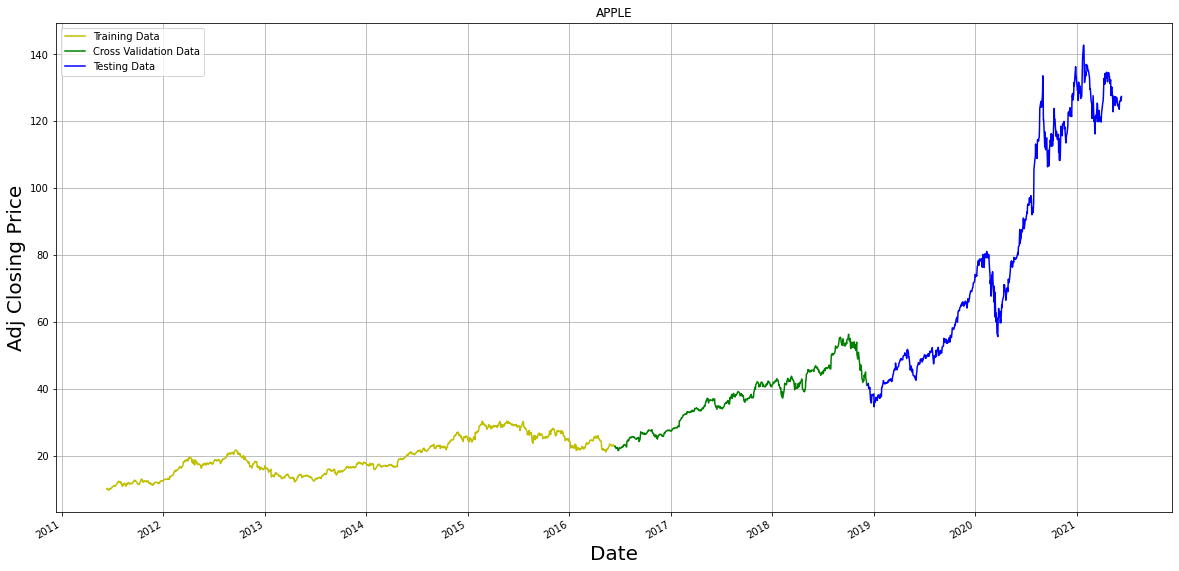

In [ ]:
num_crossval = int(0.25*len(data2))
num_test = int(0.25*len(data2))
num_train = len(data2) - num_crossval - num_test
data_crossvaltrain = data2[:num_train+num_crossval][['Date', 'Adj Close']]
data_train = data2[:num_train][['Date', 'Adj Close']]
data_crossval = data2[num_train:num_train+num_crossval][['Date', 'Adj Close']]
data_test = data2[num_train+num_crossval:][['Date', 'Adj Close']]
print("FOR APPLE")
print("Shape of Training data = " + str(data_train.shape))
print("Shape of Cross Validation data = " + str(data_crossval.shape))
print("Shape of Test Data = " + str(data_test.shape))

plot = data_train.plot(x='Date', y='Adj Close', style='y-', grid=True,title="APPLE")
plot = data_crossval.plot(x='Date', y='Adj Close', style='g-', grid=True, ax=plot)
plot = data_test.plot(x='Date', y='Adj Close', style='b-', grid=True, ax=plot)
plot.legend(['Training Data', 'Cross Validation Data', 'Testing Data'])
plot.set_xlabel("Date",fontsize=20)
plot.set_ylabel("Adj Closing Price",fontsize=20)

RMSE = [0.5740070094784296, 0.6547954887913657, 0.7296159001533614, 0.7945242597633875, 0.8576458139061073, 0.9201524020576279, 0.9811760543949243, 1.0442711418950688, 1.1028514166811458, 1.1568976768971815, 1.208857391098229, 1.2598298447748306, 1.3094809693288494, 1.3576942977316093, 1.404188169714726, 1.447960391544768, 1.4899257319419796, 1.531759904047163, 1.5738417998925758, 1.6159358593727842, 1.657327453284567, 1.698427056527009, 1.7392261057069873, 1.7802096461337906]


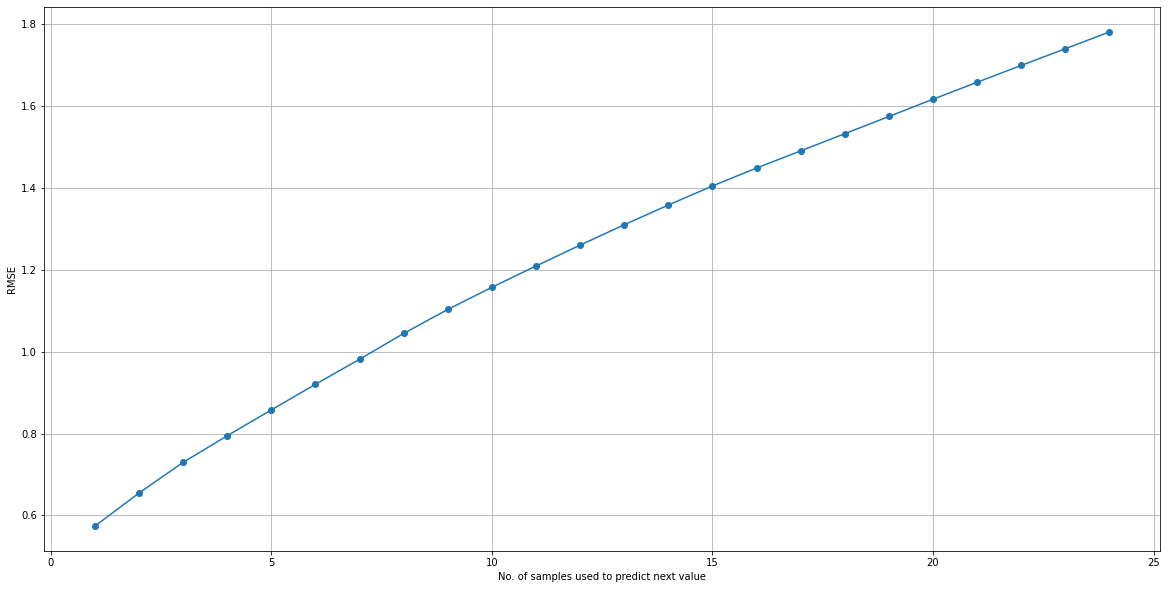

In [ ]:
RMSE = []

for N in range(1, 25): 
    output = movingavg(data_crossvaltrain, 'Adj Close', N, 0, num_train)
    data_crossval.loc[:, 'output' + '_N' + str(N)] = output
    RMSE.append(math.sqrt(mean_squared_error(output, data_crossval['Adj Close'])))
    
print('RMSE = ' + str(RMSE))
plt.plot(range(1, 25), RMSE, 'o-')
plt.xlabel('No. of samples used to predict next value')
plt.ylabel('RMSE')
plt.grid()

Text(0, 0.5, 'Adj Closing price')

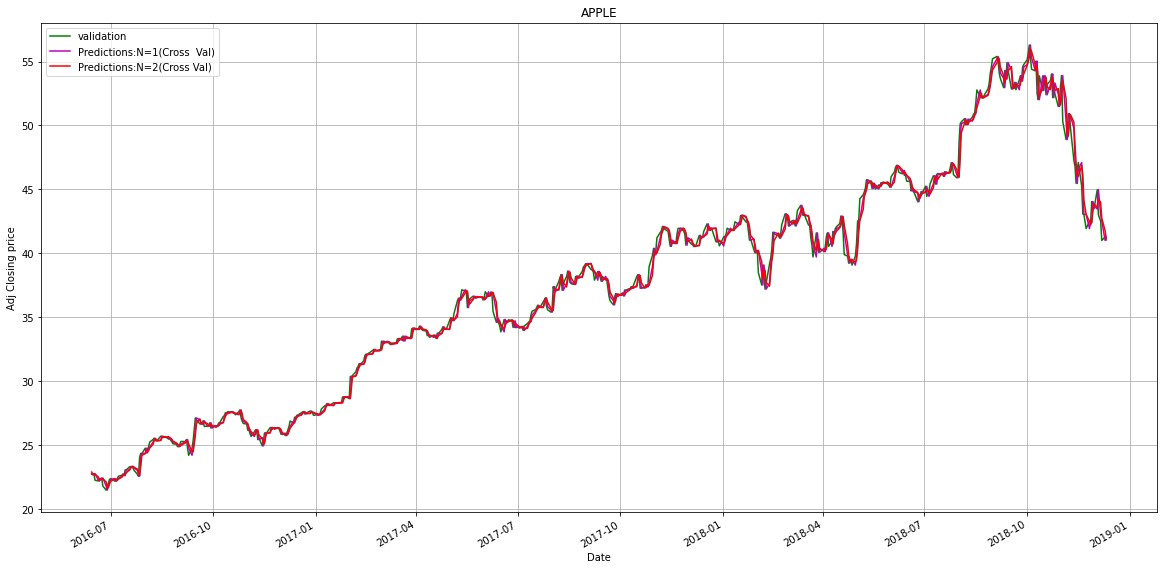

In [ ]:
Nfin=2 #from graph
p = data_crossval.plot(x='Date', y='Adj Close', style='g-', grid=True, title="APPLE")
p = data_crossval.plot(x='Date', y='output_N1', style='m-', grid=True, ax=p)
p = data_crossval.plot(x= 'Date', y='output_N2', style='r-', grid=True, ax=p)
p.legend([ 'validation',  'Predictions:N=1(Cross  Val)', 'Predictions:N=2(Cross Val)'])
p.set_xlabel("Date")
p.set_ylabel("Adj Closing price")

RMSE = 2.086
R2 Score on Test Data= 0.9960101710902256


Text(0, 0.5, 'Adj Closing Price')

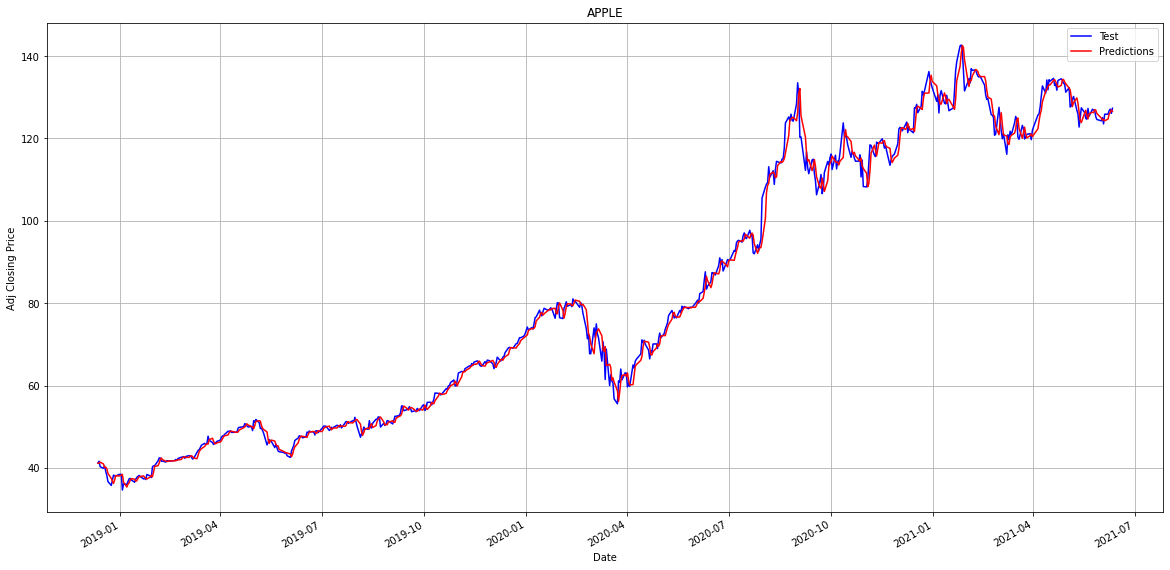

In [ ]:
###Final Model , Nfinal(Nfin)=2
estimate = movingavg(data2, 'Adj Close', 2, 0, num_train+num_crossval)
data_test.loc[:, 'output' + '_N' + str(2)] = estimate
print("RMSE = %0.3f" % math.sqrt(mean_squared_error(estimate, data_test['Adj Close'])))
print("R2 Score on Test Data=",r2_score(data_test["Adj Close"],data_test["output_N2"]))
p = data_test.plot(x='Date', y='Adj Close', style='b-', grid=True,title="APPLE" )
p = data_test.plot(x='Date', y='output_N2', style='r-', grid=True, ax=p)
p.legend([ 'Test', 'Predictions'])
p.set_xlabel("Date")
p.set_ylabel("Adj Closing Price")

# TOYOTA MOTORS

FOR TOYOTA MOTORS
Shape of Training data = (1259, 2)
Shape of Cross Validation data = (629, 2)
Shape of Test Data = (629, 2)


Text(0, 0.5, 'Adj Closing Price')

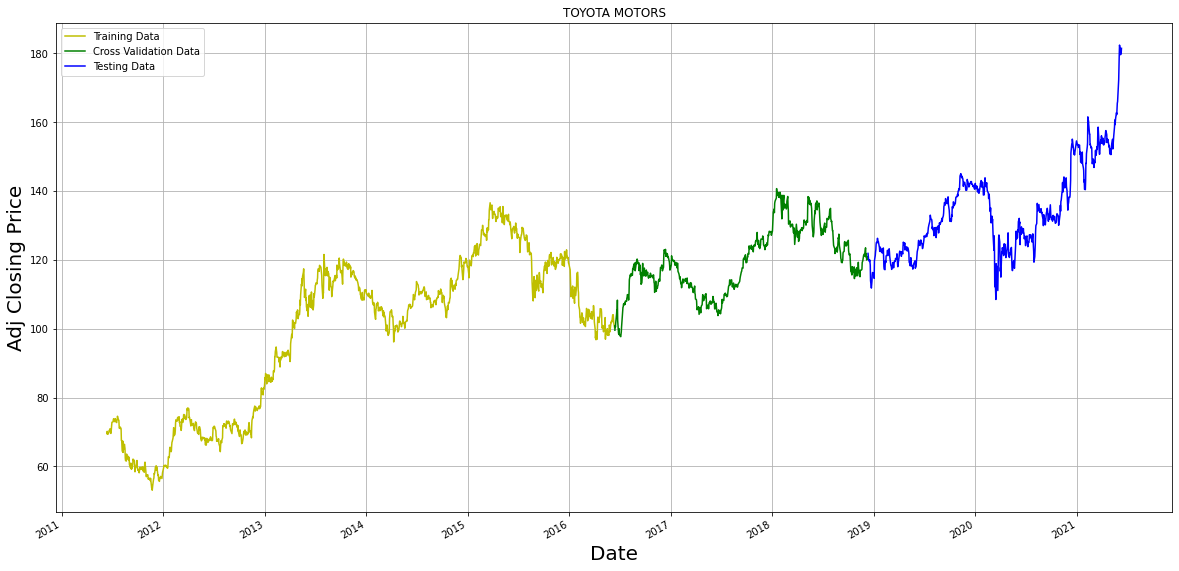

In [ ]:
num_crossval = int(0.25*len(data3))
num_test = int(0.25*len(data3))
num_train = len(data3) - num_crossval - num_test
data_crossvaltrain = data3[:num_train+num_crossval][['Date', 'Adj Close']]
data_train = data3[:num_train][['Date', 'Adj Close']]
data_crossval = data3[num_train:num_train+num_crossval][['Date', 'Adj Close']]
data_test = data3[num_train+num_crossval:][['Date', 'Adj Close']]
print("FOR TOYOTA MOTORS")
print("Shape of Training data = " + str(data_train.shape))
print("Shape of Cross Validation data = " + str(data_crossval.shape))
print("Shape of Test Data = " + str(data_test.shape))

plot = data_train.plot(x='Date', y='Adj Close', style='y-', grid=True,title="TOYOTA MOTORS")
plot = data_crossval.plot(x='Date', y='Adj Close', style='g-', grid=True, ax=plot)
plot = data_test.plot(x='Date', y='Adj Close', style='b-', grid=True, ax=plot)
plot.legend(['Training Data', 'Cross Validation Data', 'Testing Data'])
plot.set_xlabel("Date",fontsize=20)
plot.set_ylabel("Adj Closing Price",fontsize=20)

RMSE = [1.2869748970130648, 1.4246211957808474, 1.5718777108556872, 1.7258355358448598, 1.8728120713072207, 2.00467963536199, 2.126743868632743, 2.2398604984403883, 2.3438149594219224, 2.4422513251676317, 2.5346491314016046, 2.6239436970622303, 2.709798048642943, 2.788542025926646, 2.861593328182034, 2.9320997315479898, 2.998885318551664, 3.0647248711952044, 3.131076522772635, 3.1977347328500407, 3.263794334684924, 3.3311730317611996, 3.3983821920537793, 3.465037353212977]


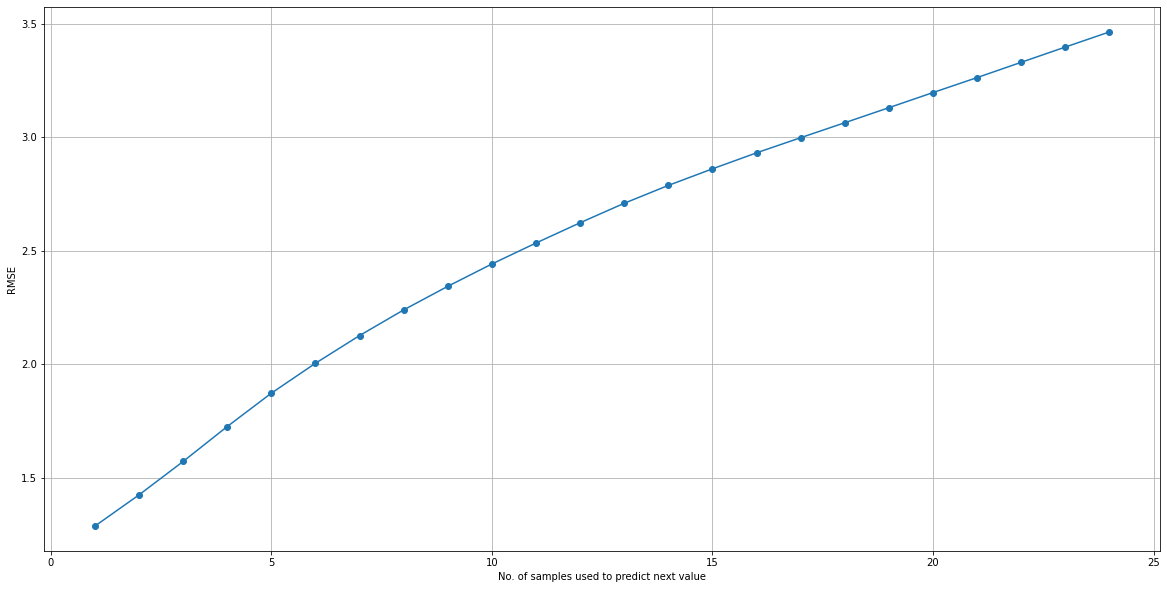

In [ ]:
RMSE = []

for N in range(1, 25): 
    output = movingavg(data_crossvaltrain, 'Adj Close', N, 0, num_train)
    data_crossval.loc[:, 'output' + '_N' + str(N)] = output
    RMSE.append(math.sqrt(mean_squared_error(output, data_crossval['Adj Close'])))
    
print('RMSE = ' + str(RMSE))
plt.plot(range(1, 25), RMSE, 'o-')
plt.xlabel('No. of samples used to predict next value')
plt.ylabel('RMSE')
plt.grid()

Text(0, 0.5, 'Adj Closing price')

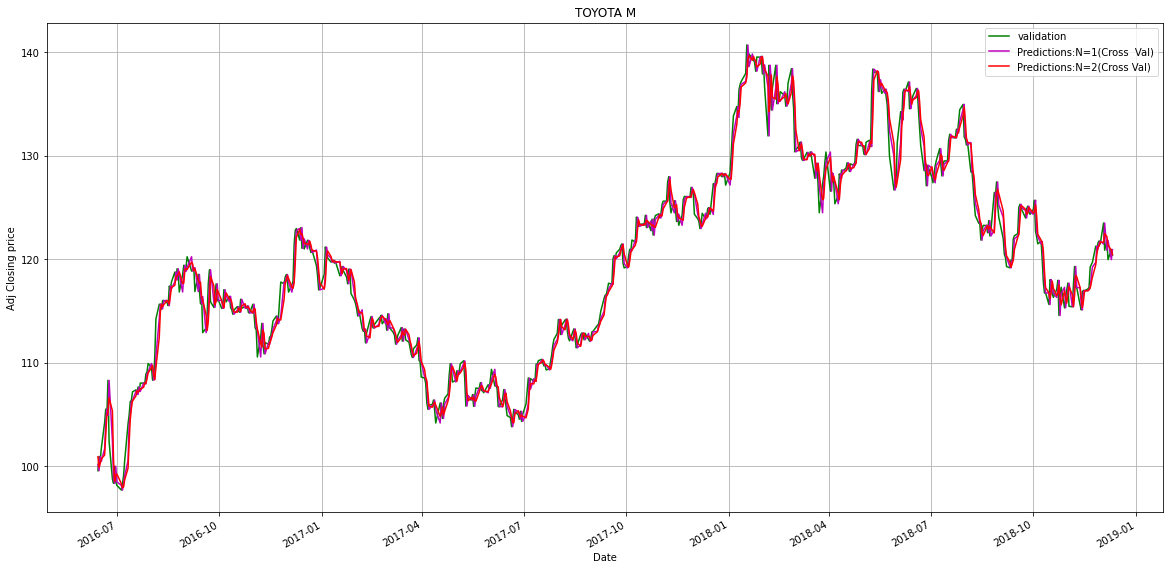

In [ ]:
Nfin=2 #from graph
p = data_crossval.plot(x='Date', y='Adj Close', style='g-', grid=True, title="TOYOTA M")
p = data_crossval.plot(x='Date', y='output_N1', style='m-', grid=True, ax=p)
p = data_crossval.plot(x= 'Date', y='output_N2', style='r-', grid=True, ax=p)
p.legend([ 'validation',  'Predictions:N=1(Cross  Val)', 'Predictions:N=2(Cross Val)'])
p.set_xlabel("Date")
p.set_ylabel("Adj Closing price")

RMSE = 2.017
R2 Score on Test Data= 0.9764154487002273


Text(0, 0.5, 'Adj Closing Price')

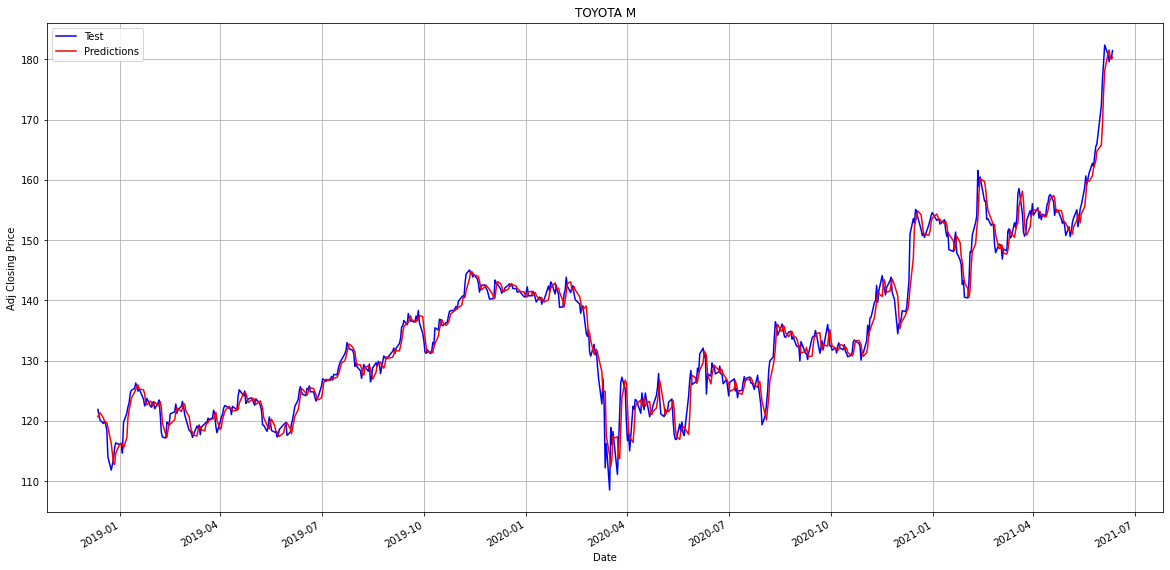

In [ ]:
###Final Model , Nfinal(Nfin)=2
estimate = movingavg(data3, 'Adj Close', 2, 0, num_train+num_crossval)
data_test.loc[:, 'output' + '_N' + str(2)] = estimate
print("RMSE = %0.3f" % math.sqrt(mean_squared_error(estimate, data_test['Adj Close'])))
print("R2 Score on Test Data=",r2_score(data_test["Adj Close"],data_test["output_N2"]))
p = data_test.plot(x='Date', y='Adj Close', style='b-', grid=True,title="TOYOTA M" )
p = data_test.plot(x='Date', y='output_N2', style='r-', grid=True, ax=p)
p.legend([ 'Test', 'Predictions'])
p.set_xlabel("Date")
p.set_ylabel("Adj Closing Price")